In [564]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [565]:
px = 16
py = 7
#c = 6
c = px*py
t = 30
Ly = 2
Lx = 10
N = (px - 2)*(py - 2)
M_4x = px - 1
M_4y = py - 1
M = 2* M_4x + 2* M_4y
a = 2
b = 1
beta = Lx/Ly
rho = 1.0
mu = 1.0
vm = 1.0
Re = Lx*vm*rho/mu

In [566]:
def euclidian_distance(x,y,xyk,c):
    matrix = np.zeros([len(x)*len(y) ,c])
    number_matrix = np.zeros([len(x)*len(y),2])
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i
            m = j + i*len(y)
            matrix[m,:] = np.sqrt(np.square(x[n]- xyk[:,0])  + np.square(y[j] - xyk[:,1])) + (2.2250738585072014e-308)**(1/(2*a))
            number_matrix[m,0] = x[n]
            number_matrix[m,1] = y[j]
    return matrix, number_matrix

def points(x,y):
    matrix = np.zeros([len(x)*len(y),2])
    boundary = np.zeros([2*len(y)-4 + 2 * len(x),2])
    interior = np.zeros([(len(x) - 2) * (len(y)-2),2])
    h, u = 0,0
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i#%len(x)
            m = j + i*len(y)
            matrix[m,0] = x[n]
            matrix[m,1] = y[j]
        
            if n == 0 or n == len(x)-1 or j == 0 or j == len(y)-1:
                
                boundary[h,0] = x[n]
                boundary[h,1] = y[j]
                h+=1
            else:
                interior[u,0] = x[n]
            
                interior[u,1] = y[j]
                u+=1
    return matrix, boundary, interior

In [567]:
x = np.linspace(0,Lx,px)
y = np.linspace(0,Ly,py)

X,Y = np.meshgrid(x,y)

#Puntos internos

x_int = x[1:-1]
y_int = y[1:-1]
Xin,Yin = np.meshgrid(x_int,y_int)

#Puntos en las fronteras:
xf1, yf1 = (x, np.zeros(1)) # f(x,0) 
X1,Y1 = np.meshgrid(xf1 , yf1)
xf2,yf2 = (x, np.ones(1)*Ly) # f(x,L)
X2,Y2 = np.meshgrid(xf2 , yf2)
xf3,yf3 = (np.zeros(1), y_int ) #f(0,y)
X3,Y3 = np.meshgrid(xf3 , yf3)
xf4,yf4 = (np.ones(1)*Lx,y_int) #f(L,y)
X4,Y4 = np.meshgrid(xf4,yf4)

#Centros
x_c = np.linspace(0,Lx,px)
y_c = np.linspace(0,Ly,py)

xk = points(x_c,y_c)[0][:,0].reshape(-1,1)
yk = points(x_c,y_c)[0][:,1].reshape(-1,1)
#c = len(x_int)
xyk1 = np.concatenate((xk,yk),axis = 1)

#Puntos test
x_test = np.linspace(0,Lx,t)
y_test = np.linspace(0,Ly,t)
Xt,Yt = np.meshgrid(x_test,y_test)
x_vector = points(x,y)[0][:,0].reshape(-1,1)
y_vector = points(x,y)[0][:,1].reshape(-1,1)
x_vector.shape
x_v2 = euclidian_distance(x,y,xyk1,c)[1][:,0].reshape(-1,1)
x_v2.shape
bbb = points(x,y)[1]
bbb.shape
#bbb[-1]

(42, 2)

In [568]:
def tps_rbf(euclidian_distance,a=a,b=b):
    #if euclidian_distance == 0:
    #    return 0
    #else:
    return (euclidian_distance*b)**(2*a) *np.log(b*euclidian_distance) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdx(x_vector,euclidian_distance,a=a,b=b):
        return (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)# #euclidian_distance + 1e-10 to avoid singularity at zero  
    
def tpsdy(y_vector,euclidian_distance,a=a,b=b):
        return (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1) /(euclidian_distance) * (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1)) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdxx(x_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)
                        + ((x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) + 1) + 2*a))

def tpsdyy(y_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance ) + 1)
                        + ((y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) +1) +2*a))
  

In [569]:
def tps_rbf2(euclidian_distance,a=a,b=b):
    resultado = (euclidian_distance*b)**(2*a) *np.log(b*euclidian_distance)
    z1, z2 = np.where(euclidian_distance == 0)
    resultado[z1,z2] = 0
    
    return resultado
def tpsdx2(x_vector,euclidian_distance,a=a,b=b):
    resultado =  (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance * (b)**(2*a) *2*a*euclidian_distance**(2*a-1)*(np.log(b*euclidian_distance) + 1)# #euclidian_distance + 1e-10 to avoid singularity at zero  
    z1, z2 = np.where(euclidian_distance == 0)
    resultado[z1,z2] = 0
    return resultado

def tpsdy2(y_vector,euclidian_distance,a=a,b=b):
    resultado = (b)**(2*a) *(2*a*euclidian_distance**(2*a-1)*np.log(b*euclidian_distance) + b*euclidian_distance**(2*a) /(b*euclidian_distance)) * (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1)) #euclidian_distance + 1e-10 to avoid singularity at zero
    z1, z2 = np.where(euclidian_distance == 0)
    resultado[z1,z2] = 0
    return resultado
def tpsdxx2(x_vector,euclidian_distance,a=a,b=b):
    resultado = ((euclidian_distance**2 - (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *2*a*euclidian_distance**(2*a-1)*(np.log(b*euclidian_distance) + 1)
                        + ((x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) ) +2*a))
    z1, z2 = np.where(euclidian_distance == 0)
    resultado[z1,z2] = 0
    return resultado

def tpsdyy2(y_vector,euclidian_distance,a=a,b=b):
    resultado = ((euclidian_distance**2 - (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *2*a*euclidian_distance**(2*a-1)*(np.log(b*euclidian_distance) + 1)
                        + ((y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) ) +2*a))
    z1, z2 = np.where(euclidian_distance == 0)
    resultado[z1,z2] = 0
    return resultado


In [570]:
euclidian_dist_complete = euclidian_distance(x,y,xyk1,c)[0]
euclidian_dist_int = euclidian_distance(x_int,y_int,xyk1,c)[0]

euclidian_dist_border1 = euclidian_distance(xf1,yf1,xyk1,c)[0]
euclidian_dist_border2 = euclidian_distance(xf2,yf2,xyk1,c)[0]
euclidian_dist_border3 = euclidian_distance(xf3,yf3,xyk1,c)[0]
euclidian_dist_border4 = euclidian_distance(xf4,yf4,xyk1,c)[0]

In [571]:
(np.where(np.isnan(tpsdxx(x_vector,euclidian_dist_complete,a=a,b=b))))[0].shape

(0,)

In [572]:
tpsdxx(x_vector,euclidian_dist_complete,a=a,b=b)

array([[-1.05520070e-151, -3.77161017e-001, -2.76382414e-001, ...,
         3.49188944e+003,  3.50805577e+003,  3.52778967e+003],
       [-3.77161017e-001, -1.05520070e-151, -3.77161017e-001, ...,
         3.47930255e+003,  3.49188944e+003,  3.50805577e+003],
       [-2.76382414e-001, -3.77161017e-001, -1.05520070e-151, ...,
         3.47030474e+003,  3.47930255e+003,  3.49188944e+003],
       ...,
       [ 3.49188944e+003,  3.47930255e+003,  3.47030474e+003, ...,
        -1.05520070e-151, -3.77161017e-001, -2.76382414e-001],
       [ 3.50805577e+003,  3.49188944e+003,  3.47930255e+003, ...,
        -3.77161017e-001, -1.05520070e-151, -3.77161017e-001],
       [ 3.52778967e+003,  3.50805577e+003,  3.49188944e+003, ...,
        -2.76382414e-001, -3.77161017e-001, -1.05520070e-151]])

In [573]:
x_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,0]
y_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,1]
euclidian_dist_int
i , j = np.where(euclidian_dist_int == 0)
i

array([], dtype=int64)

In [574]:
(tpsdxx(x_vector_int,euclidian_dist_int) )**2

array([[2.32309985e+00, 8.99899891e-01, 2.32309985e+00, ...,
        8.76485156e+06, 8.83824378e+06, 8.93294032e+06],
       [9.83933500e+00, 2.32309985e+00, 8.99899891e-01, ...,
        8.71256752e+06, 8.76485156e+06, 8.83824378e+06],
       [3.39557947e+01, 9.83933500e+00, 2.32309985e+00, ...,
        8.68125248e+06, 8.71256752e+06, 8.76485156e+06],
       ...,
       [8.76485156e+06, 8.71256752e+06, 8.68125248e+06, ...,
        2.32309985e+00, 9.83933500e+00, 3.39557947e+01],
       [8.83824378e+06, 8.76485156e+06, 8.71256752e+06, ...,
        8.99899891e-01, 2.32309985e+00, 9.83933500e+00],
       [8.93294032e+06, 8.83824378e+06, 8.76485156e+06, ...,
        2.32309985e+00, 8.99899891e-01, 2.32309985e+00]])

In [575]:
#tps_rbf(euclidian_dist_int)
#tpsdx(x_vector,euclidian_dist_complete).shape
#tpsdy(y_int,euclidian_dist_border3).shape
tpsdxx(x_vector_int,euclidian_dist_int).shape
#tpsdyy(y_vector,ed).shape

(70, 112)

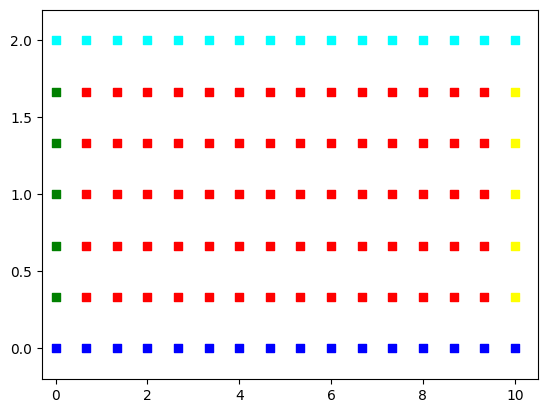

In [576]:
#Plot the colocation points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-0.3,Lx*1.05])
ax.set_ylim([-0.2,Ly*1.1])
ax.scatter(Xin,Yin,marker='s', color='red')
ax.scatter(X1,Y1,marker='s', color = 'blue')

ax.scatter(X2,Y2,marker='s', color = 'cyan')
ax.scatter(X3,Y3,marker='s', color = 'green')
ax.scatter(X4,Y4,marker = 's' ,color = 'yellow')
#ax.scatter(XC,YC, color = 'black')
plt.show()

In [577]:

gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(y_int)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(y_int,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(y_int)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(y_int,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)
gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(y_int),euclidian_dist_border3)
gyy_b3 = tpsdyy(y_int,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(y_int),euclidian_dist_border3)
gy_b3 = tpsdy(y_int,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)


In [578]:
##Intentos desesperados
'''
gxx_int = (tpsdxx2(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy2(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx2(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy2(y_vector_int,euclidian_dist_int)
g_int = tps_rbf2(euclidian_dist_int)
gx_b4 = tpsdx2(np.ones_like(y_int)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy2(y_int,euclidian_dist_border4)
gxx_b4 = tpsdxx2(np.ones_like(y_int)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy2(y_int,euclidian_dist_border4)
gb2 = tps_rbf2(euclidian_dist_border2)
gb3 = tps_rbf2(euclidian_dist_border3)
gxx_b3 = tpsdxx2(np.zeros_like(y_int),euclidian_dist_border3)
gyy_b3 = tpsdyy2(y_int,euclidian_dist_border3)
gx_b3 = tpsdx2(np.zeros_like(y_int),euclidian_dist_border3)
gy_b3 = tpsdy2(y_int,euclidian_dist_border3)

gb1 = tps_rbf2(euclidian_dist_border1)
'''


'\ngxx_int = (tpsdxx2(x_vector_int,euclidian_dist_int)) \ngyy_int =  (tpsdyy2(y_vector_int,euclidian_dist_int)) \ngx_int = (tpsdx2(x_vector_int,euclidian_dist_int)) \ngy_int = tpsdy2(y_vector_int,euclidian_dist_int)\ng_int = tps_rbf2(euclidian_dist_int)\ngx_b4 = tpsdx2(np.ones_like(y_int)*Lx,euclidian_dist_border4 )\ngy_b4 = tpsdy2(y_int,euclidian_dist_border4)\ngxx_b4 = tpsdxx2(np.ones_like(y_int)*Lx,euclidian_dist_border4)\ngyy_b4 = tpsdyy2(y_int,euclidian_dist_border4)\ngb2 = tps_rbf2(euclidian_dist_border2)\ngb3 = tps_rbf2(euclidian_dist_border3)\ngxx_b3 = tpsdxx2(np.zeros_like(y_int),euclidian_dist_border3)\ngyy_b3 = tpsdyy2(y_int,euclidian_dist_border3)\ngx_b3 = tpsdx2(np.zeros_like(y_int),euclidian_dist_border3)\ngy_b3 = tpsdy2(y_int,euclidian_dist_border3)\n\ngb1 = tps_rbf2(euclidian_dist_border1)\n'

In [579]:
weights = np.random.rand(2*px*py,1) / (px*py)


In [580]:
N+M == px*py

True

In [581]:
#-np.dot(gxx_int,wx) - np.dot(gyy_int,wx) #-20

In [582]:

def stationary_navier_stokes(weights):
        
    wx = weights[:N+M].reshape(-1,1)
    wy = weights[N+M:].reshape(-1,1)
    
    F = np.zeros(((3*N+4*(M_4x+1) + 6*(M_4y-1)),))
    
    
    F[0:N] =  ( 1/Re*(-1/beta**2*np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) - 10/beta).flatten()
    
    F[N:2*N] = ( 1/Re*(-1/beta**2*np.dot(gxx_int,wy) - np.dot(gyy_int,wy))).flatten() 
    F[2*N:3*N] = (np.dot(gx_int,wx)/Lx + np.dot(gy_int,wy)/Ly).flatten()
    

    F[3*N+4*(M_4x+1) : 3*N+4*(M_4x+1) +1*(M_4y-1) ] = ( 1/Re*(-1/beta**2*np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) - 10/beta ).flatten()
    F[3*N+4*(M_4x+1) +1*(M_4y-1) : 3*N+4*(M_4x+1) + 2*(M_4y-1) ] = ( 1/Re*(-1/beta**2*np.dot(gxx_b3,wx) - np.dot(gyy_b3,wx)) - 10/beta).flatten()
    F[ 3*N+4*(M_4x+1) + 2*(M_4y-1):  3*N+4*(M_4x+1) + 3*(M_4y-1)] = (np.dot(gx_b4,wx)/Lx + np.dot(gy_b4,wy)/Ly).flatten()
    F[3*N+4*(M_4x+1) + 3*(M_4y-1): 3*N+4*(M_4x+1) + 4*(M_4y-1)] = (np.dot(gx_b3,wx)/Lx + np.dot(gy_b3,wy)/Ly).flatten()
    #F[3*N :3*N + (M_4 - 1)] = (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N+4*(M_4x+1) + 4*(M_4y-1): 3*N + 4*(M_4x+1) + 5*(M_4y-1)] = ( 1/Re*(-1/beta**2*np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy))).flatten()
    F[3*N + 4*(M_4x+1) + 5*(M_4y-1): 3*N + 4*(M_4x+1) + 6*(M_4y-1)] = ( 1/Re*(-1/beta**2*np.dot(gxx_b3,wy) - np.dot(gyy_b3,wy))).flatten()
    
    F[3*N  : 3*N +  M_4x + 1] = ( np.dot( gb2 , wx ) ).flatten()
    F[3*N + ( M_4x + 1 ): 3*N + 2 * ( M_4x + 1 )] = (np.dot(gb1,wx)).flatten()
    
    #F[3*N + 2*(M_4 - 1) + 2*(M_4 + 1):3*N + 3*(M_4 - 1) + 2*(M_4 + 1)] = (np.dot(gb3,wy)).flatten()
    F[3*N + 2 * ( M_4x + 1 ):3*N + 3 * ( M_4x + 1 )] = (np.dot(gb2,wy)).flatten()
    F[3*N + 3 * ( M_4x + 1 ):3*N + 4 * ( M_4x + 1 )] = (np.dot(gb1,wy)).flatten()
    #F[3*N + 1*(M_4 - 1)+ 4*(M_4 + 1):3*N + 2*(M_4 - 1)+ 4*(M_4 + 1)] = np.dot(gx_b4,wy).flatten()
    
    #F[3*N + 2*(M_4 - 1)+ 4*(M_4 + 1):3*N + 3*(M_4 - 1)+ 4*(M_4 + 1)] = ( -np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx) - 10).flatten()
    #F[3*N + 5*(M_4 - 1)+ 4*(M_4 + 1):3*N + 5*(M_4 - 1)+ 5*(M_4 + 1)] = ( -np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)).flatten()
    
    
    return F#,F.shape
    
    

In [583]:

def stationary_navier_stokes(weights):
        
    wx = weights[:N+M].reshape(-1,1)
    wy = weights[N+M:].reshape(-1,1)
    
    F = np.zeros(((3*N+4*(M_4x+1) + 6*(M_4y-1)),))
    
    
    F[0:N] =  ( -np.dot(gxx_int,wx) - np.dot(gyy_int,wx) - 10).flatten()
    
    F[N:2*N] = (-np.dot(gxx_int,wy) - np.dot(gyy_int,wy)).flatten() 
    F[2*N:3*N] = (np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()
    

    F[3*N+4*(M_4x+1) : 3*N+4*(M_4x+1) +1*(M_4y-1) ] = ( -np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)-10 ).flatten()
    F[3*N+4*(M_4x+1) +1*(M_4y-1) : 3*N+4*(M_4x+1) + 2*(M_4y-1) ] = ( -np.dot(gxx_b3,wx) - np.dot(gyy_b3,wx) -10).flatten()
    F[ 3*N+4*(M_4x+1) + 2*(M_4y-1):  3*N+4*(M_4x+1) + 3*(M_4y-1)] = (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N+4*(M_4x+1) + 3*(M_4y-1): 3*N+4*(M_4x+1) + 4*(M_4y-1)] = (np.dot(gx_b3,wx) + np.dot(gy_b3,wy)).flatten()
    #F[3*N :3*N + (M_4 - 1)] = (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N+4*(M_4x+1) + 4*(M_4y-1): 3*N + 4*(M_4x+1) + 5*(M_4y-1)] = ( -np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)).flatten()
    F[3*N + 4*(M_4x+1) + 5*(M_4y-1): 3*N + 4*(M_4x+1) + 6*(M_4y-1)] = ( -np.dot(gxx_b3,wy) - np.dot(gyy_b3,wy)).flatten()
    
    F[3*N  : 3*N +  M_4x + 1] = ( np.dot( gb2 , wx ) ).flatten()
    F[3*N + ( M_4x + 1 ): 3*N + 2 * ( M_4x + 1 )] = (np.dot(gb1,wx)).flatten()
    
    #F[3*N + 2*(M_4 - 1) + 2*(M_4 + 1):3*N + 3*(M_4 - 1) + 2*(M_4 + 1)] = (np.dot(gb3,wy)).flatten()
    F[3*N + 2 * ( M_4x + 1 ):3*N + 3 * ( M_4x + 1 )] = (np.dot(gb2,wy)).flatten()
    F[3*N + 3 * ( M_4x + 1 ):3*N + 4 * ( M_4x + 1 )] = (np.dot(gb1,wy)).flatten()
    #F[3*N + 1*(M_4 - 1)+ 4*(M_4 + 1):3*N + 2*(M_4 - 1)+ 4*(M_4 + 1)] = np.dot(gx_b4,wy).flatten()
    
    #F[3*N + 2*(M_4 - 1)+ 4*(M_4 + 1):3*N + 3*(M_4 - 1)+ 4*(M_4 + 1)] = ( -np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx) - 10).flatten()
    #F[3*N + 5*(M_4 - 1)+ 4*(M_4 + 1):3*N + 5*(M_4 - 1)+ 5*(M_4 + 1)] = ( -np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)).flatten()
    
    
    return F#,F.shape
    
    

In [584]:
stationary_navier_stokes(weights)[-1]

-605.7457877210913

In [585]:
from scipy.optimize import least_squares

# Define el vector inicial
x0 = (weights.reshape(-1) ) # tamaño_total = tamaño del vector weights
print(stationary_navier_stokes(weights).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado = least_squares(stationary_navier_stokes, x0, method='trf', verbose = 2) 

True
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.8519e+07                                    4.22e+08    
       1              2         1.5097e+03      6.85e+07       7.23e-02       6.82e+04    
       2              3         7.6645e+00      1.50e+03       1.45e-01       1.31e+01    
       3              4         2.5041e+00      5.16e+00       2.89e-01       2.31e+00    
       4              5         1.4130e-01      2.36e+00       5.78e-01       3.92e-01    
       5              6         3.1362e-02      1.10e-01       1.16e+00       1.74e+00    
       6              7         3.0986e-02      3.76e-04       2.78e-01       5.53e+00    
       7              8         3.0986e-02      3.81e-08       1.42e-02       7.05e-02    
       8              9         3.0986e-02      9.36e-08       3.55e-03       5.08e-02    
       9             11         3.0986e-02      8.92e-09       8.87e-04       7.49e-0

In [586]:
resultado.success

True

In [587]:
resultado

 active_mask: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 

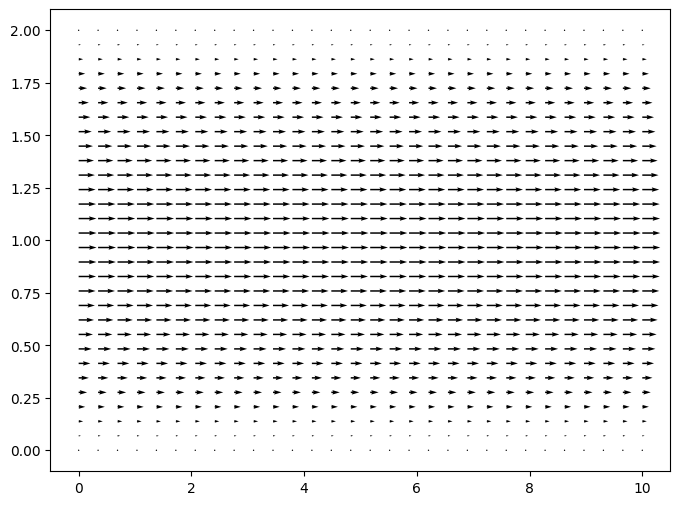

In [588]:
# Plot quiver 
euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]
ux = tps_rbf2(euclidian_dist_test) @ resultado.x[:N+M]
uy = tps_rbf2(euclidian_dist_test) @ resultado.x[N+M:]

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xt, Yt, ux.reshape(t,t).T, uy.reshape(t,t).T)

5.064246953483234
5.070330367903807


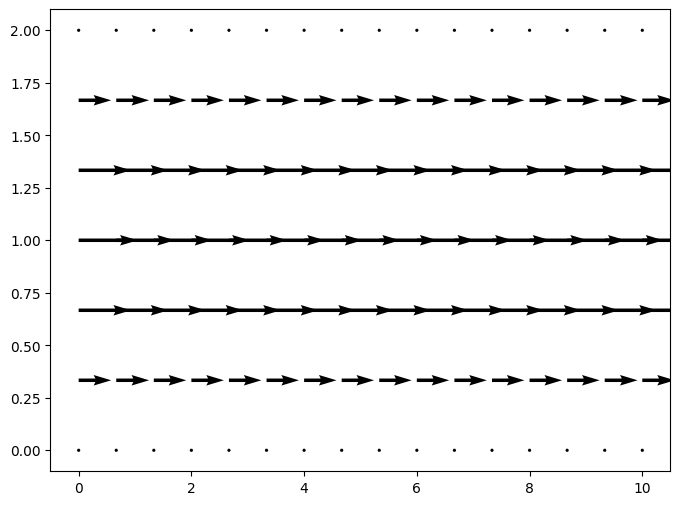

In [589]:
print(np.max(ux))
print(np.max(tps_rbf2(euclidian_dist_complete) @ resultado.x[:N+M]))
u_int =tps_rbf2(euclidian_dist_complete) @ resultado.x[:N+M]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(X, Y, u_int.reshape(px,py).T, np.zeros_like(u_int.reshape(px,py)) )

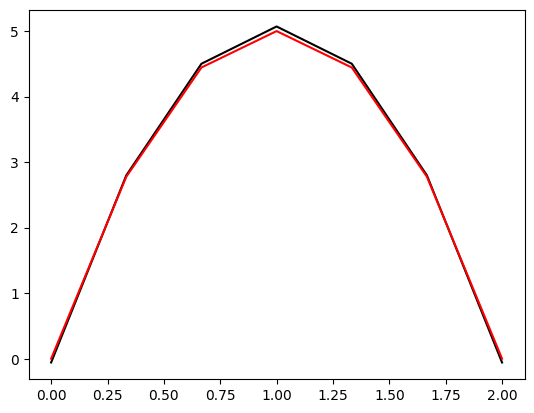

In [590]:
#print("Error:" ,np.mean( ((u_int.reshape(px-2,py-2).T[:,0] - -5*Re/beta*(y_int**2 - Ly*y_int))/(-5*Re/beta*(y_int**2 - Ly*y_int)))**2 )*100,'%')
#print("Error:" ,np.mean( ((u_int.reshape(px-2,py-2).T[:,0] - -5*(y_int**2 - Ly*y_int))/(-5*(y_int**2 - Ly*y_int)))**2 )*100,'%')

plt.plot(y,u_int.reshape(px,py).T[:,0],color = 'black')
#plt.plot(y_int, -5*Re/beta*(y_int**2 - Ly*y_int),color = 'red')
plt.plot(y, -5*(y**2 - Ly*y),color = 'red')




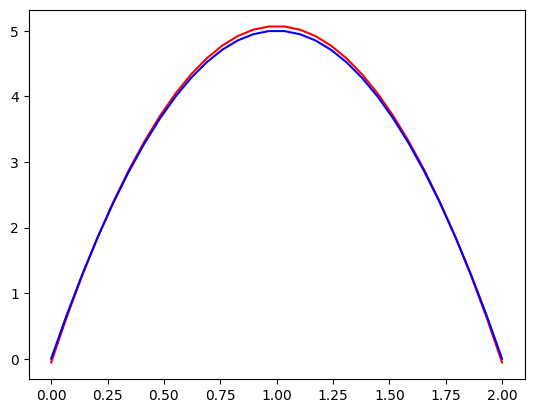

In [591]:

plt.plot(y_test,ux.reshape(t,t).T[:,0], color = 'red')
plt.plot(y_test,-5*(y_test**2 - Ly*y_test), color = 'blue')

In [592]:
'''
gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(y_int)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(y_int,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(y_int)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(y_int,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)
gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(y_int),euclidian_dist_border3)
gyy_b3 = tpsdyy(y_int,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(y_int),euclidian_dist_border3)
gy_b3 = tpsdy(y_int,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)
gb4 = tps_rbf(euclidian_dist_border4)
'''

'\ngxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) \ngyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) \ngx_int = (tpsdx(x_vector_int,euclidian_dist_int)) \ngy_int = tpsdy(y_vector_int,euclidian_dist_int)\ng_int = tps_rbf(euclidian_dist_int)\ngx_b4 = tpsdx(np.ones_like(y_int)*Lx,euclidian_dist_border4 )\ngy_b4 = tpsdy(y_int,euclidian_dist_border4)\ngxx_b4 = tpsdxx(np.ones_like(y_int)*Lx,euclidian_dist_border4)\ngyy_b4 = tpsdyy(y_int,euclidian_dist_border4)\ngb2 = tps_rbf(euclidian_dist_border2)\ngb3 = tps_rbf(euclidian_dist_border3)\ngxx_b3 = tpsdxx(np.zeros_like(y_int),euclidian_dist_border3)\ngyy_b3 = tpsdyy(y_int,euclidian_dist_border3)\ngx_b3 = tpsdx(np.zeros_like(y_int),euclidian_dist_border3)\ngy_b3 = tpsdy(y_int,euclidian_dist_border3)\n\ngb1 = tps_rbf(euclidian_dist_border1)\ngb4 = tps_rbf(euclidian_dist_border4)\n'

In [593]:
gx_b3.shape

(5, 112)

In [611]:
#Mas medidas desesperadas


gxx_int = (tpsdxx2(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy2(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx2(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy2(y_vector_int,euclidian_dist_int)
g_int = tps_rbf2(euclidian_dist_int)
gx_b4 = tpsdx2(np.ones_like(y_int)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy2(y_int,euclidian_dist_border4)
gxx_b4 = tpsdxx2(np.ones_like(y_int)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy2(y_int,euclidian_dist_border4)
gb2 = tps_rbf2(euclidian_dist_border2)
gb3 = tps_rbf2(euclidian_dist_border3)
gxx_b3 = tpsdxx2(np.zeros_like(y_int),euclidian_dist_border3)
gyy_b3 = tpsdyy2(y_int,euclidian_dist_border3)
gx_b3 = tpsdx2(np.zeros_like(y_int),euclidian_dist_border3)
gy_b3 = tpsdy2(y_int,euclidian_dist_border3)

gb1 = tps_rbf2(euclidian_dist_border1)
gb4 = tps_rbf2(euclidian_dist_border4)


In [612]:
gb3.shape

(5, 112)

In [613]:
phidphidx2 = np.array([(g_int[i,:].reshape(-1,1) @ gx_int[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int))])
phidphidy2 = np.array([(g_int[i,:].reshape(-1,1) @ gy_int[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int))])

phidphidx_b32 = np.array([(gb3[i,:].reshape(-1,1) @ gx_b3[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3))])
phidphidy_b32 = np.array([(gb3[i,:].reshape(-1,1) @ gy_b3[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3))])
phidphidx_b42 = np.array([(gb4[i,:].reshape(-1,1) @ gx_b4[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4))])
phidphidy_b42 = np.array([(gb4[i,:].reshape(-1,1) @ gy_b4[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4))])


In [614]:
np.where(gxx_int==0)[0].shape

(0,)

In [615]:
#(wx@wy.T)[0,10] == wx[0]*wy[10]
#wxiwyj = (wx@wy.T).reshape(-1)
#wxiwyj[10] == wx[10]*wy[0]

In [616]:
#phidphidx2 = np.array([ g_int[:,i] * gx_int[:,j] for i in range(g_int.shape[1]) for j in range(gx_int.shape[1])]  ).T

#phidphidy2 = np.array([g_int[:,i] * gy_int[:,j] for i in range(g_int.shape[1]) for j in range(gy_int.shape[1])] ).T

#phidphidx_b32 = np.array([ gb3[:,i] * gx_b3[:,j] for i in range(gxx_b3.shape[1]) for j in range(gx_b3.shape[1])]  ).T
#phidphidx_b42 = np.array([ gb4[:,i] * gx_b4[:,j] for i in range(gxx_b4.shape[1]) for j in range(gx_b4.shape[1])]  ).T
#phidphidy_b32 = np.array([ gb3[:,i] * gy_b3[:,j] for i in range(gxx_b3.shape[1]) for j in range(gy_b3.shape[1])]  ).T
#phidphidy_b42 = np.array([ gb4[:,i] * gy_b4[:,j] for i in range(gxx_b4.shape[1]) for j in range(gy_b4.shape[1])]  ).T

#phidphidy_b4.shape
#(phidphidx2==phidphidx).all()

#(phidphidx_b32.shape == phidphidx_b3.shape)

In [617]:
#(wx@ wx.T).reshape(-1,1)[len(wx)] == wx[1]*wx[0]

In [618]:

def NavierStokess(weights):
        
    wx = weights[:N+M].reshape(-1,1)
    wy = weights[N+M:].reshape(-1,1)
    #Review why is it better without the transpose
    wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
    wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
    wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
    wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    
    
    #weights = np.concatenate((wx,wxiwxj,wyiwxj,wy,wxiwyj,wyiwyj),axis = 0)
    
    
    F = np.zeros( ( ( 3*N + 4 * ( M_4x + 1 ) + 6 * ( M_4y - 1 ) ) , ) )
    #Ecuaiones diferenciales en puntos internos
        #Ecuacion en x
    wx = weights[:N+M].reshape(-1,1)
    wy = weights[N+M:].reshape(-1,1)
    
    F = np.zeros(((3*N+4*(M_4x+1) + 6*(M_4y-1)),))
    
    
    F[0:N] =  ( -np.dot(gxx_int,wx) - np.dot(gyy_int,wx) - 10 + np.dot(phidphidx2,wxiwxj) + np.dot(phidphidy2,wyiwxj)).flatten()
    
    F[N:2*N] = (-np.dot(gxx_int,wy) - np.dot(gyy_int,wy) + np.dot(phidphidx2,wxiwyj) + np.dot(phidphidy2,wyiwyj) ).flatten() 
    F[2*N:3*N] = (np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()
    

    F[3*N+4*(M_4x+1) : 3*N+4*(M_4x+1) +1*(M_4y-1) ] = ( -np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx) -10 + np.dot(phidphidx_b42,wxiwxj) + np.dot(phidphidy_b42,wyiwxj)).flatten()
    F[3*N+4*(M_4x+1) +1*(M_4y-1) : 3*N+4*(M_4x+1) + 2*(M_4y-1) ] = ( -np.dot(gxx_b3,wx) - np.dot(gyy_b3,wx) -10+ np.dot(phidphidx_b32,wxiwxj) + np.dot(phidphidy_b32,wyiwxj)).flatten()
    F[ 3*N+4*(M_4x+1) + 2*(M_4y-1):  3*N+4*(M_4x+1) + 3*(M_4y-1)] = (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N+4*(M_4x+1) + 3*(M_4y-1): 3*N+4*(M_4x+1) + 4*(M_4y-1)] = (np.dot(gx_b3,wx) + np.dot(gy_b3,wy)).flatten()
    #F[3*N :3*N + (M_4 - 1)] = (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N+4*(M_4x+1) + 4*(M_4y-1): 3*N + 4*(M_4x+1) + 5*(M_4y-1)] = ( -np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy) + np.dot(phidphidx_b42,wxiwyj) + np.dot(phidphidy_b42,wyiwyj)).flatten()
    F[3*N + 4*(M_4x+1) + 5*(M_4y-1): 3*N + 4*(M_4x+1) + 6*(M_4y-1)] = ( -np.dot(gxx_b3,wy) - np.dot(gyy_b3,wy)+ np.dot(phidphidx_b32,wxiwyj) + np.dot(phidphidy_b32,wyiwyj)).flatten()
    
    F[3*N  : 3*N +  M_4x + 1] = ( np.dot( gb2 , wx ) ).flatten()
    F[3*N + ( M_4x + 1 ): 3*N + 2 * ( M_4x + 1 )] = (np.dot(gb1,wx)).flatten()
    
    #F[3*N + 2*(M_4 - 1) + 2*(M_4 + 1):3*N + 3*(M_4 - 1) + 2*(M_4 + 1)] = (np.dot(gb3,wy)).flatten()
    F[3*N + 2 * ( M_4x + 1 ):3*N + 3 * ( M_4x + 1 )] = (np.dot(gb2,wy)).flatten()
    F[3*N + 3 * ( M_4x + 1 ):3*N + 4 * ( M_4x + 1 )] = (np.dot(gb1,wy)).flatten()
    #F[3*N + 1*(M_4 - 1)+ 4*(M_4 + 1):3*N + 2*(M_4 - 1)+ 4*(M_4 + 1)] = np.dot(gx_b4,wy).flatten()
    
    #F[3*N + 2*(M_4 - 1)+ 4*(M_4 + 1):3*N + 3*(M_4 - 1)+ 4*(M_4 + 1)] = ( -np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx) - 10).flatten()
    #F[3*N + 5*(M_4 - 1)+ 4*(M_4 + 1):3*N + 5*(M_4 - 1)+ 5*(M_4 + 1)] = ( -np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)).flatten()
    return F#,F.shape
    
    

In [619]:
NavierStokess(weights)[-1]
np.where(NavierStokess(weights) == 0)

(array([], dtype=int64),)

In [620]:
weights.shape

(224, 1)

In [621]:
from scipy.optimize import least_squares
w = np.random.normal(0,(Ly/(2*px*py)),2*px*py)*Ly
# Define el vector inicial
x0 = (w.reshape(-1) ) # tamaño_total = tamaño del vector weights
print( NavierStokess(x0).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado2 = least_squares(NavierStokess, x0, method='trf', verbose = 2) 

True


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8109e+14                                    4.56e+15    
       1              2         1.1298e+13      1.70e+14       2.73e-01       5.69e+14    
       2              3         6.9795e+11      1.06e+13       5.45e-01       7.06e+13    
       3              4         4.3235e+10      6.55e+11       1.09e+00       8.75e+12    
       4              5         2.6893e+09      4.05e+10       2.18e+00       1.09e+12    
       5              6         1.6632e+08      2.52e+09       4.36e+00       1.36e+11    
       6              7         9.4267e+06      1.57e+08       8.72e+00       1.63e+10    
       7              8         1.1686e+05      9.31e+06       1.74e+01       3.37e+08    
       8              9         2.1863e+04      9.50e+04       3.49e+01       1.13e+08    
       9             10         1.9940e+04      1.92e+03       2.94e+01       1.05e+08    

In [256]:
from scipy.optimize import least_squares

# Define el vector inicial
x0 = (resultado2.x.reshape(-1) ) # tamaño_total = tamaño del vector weights
print( NavierStokess(x0).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado2_1 = least_squares(NavierStokess, x0, method='lm',verbose = 2) 

True


KeyboardInterrupt: 

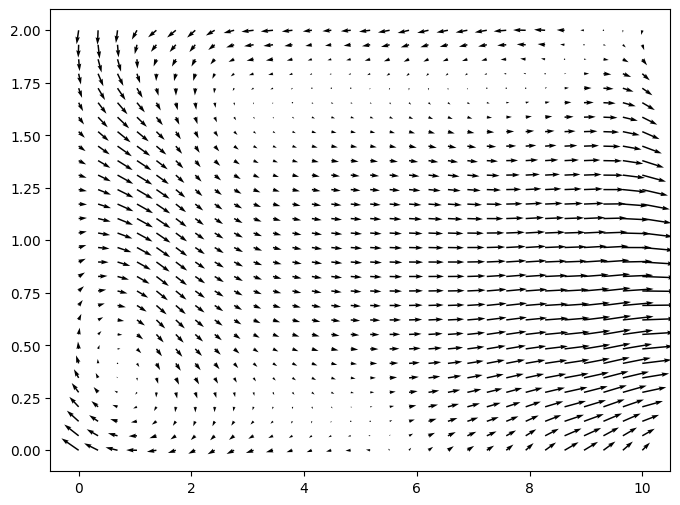

In [609]:
# Plot quiver 
euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]
ux2 = tps_rbf(euclidian_dist_test) @ resultado2.x[:N+M]
uy2 = tps_rbf(euclidian_dist_test) @ resultado2.x[N+M:]

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xt, Yt, ux2.reshape(t,t).T, uy2.reshape(t,t).T)

ERROR: 150.51952382307152 %


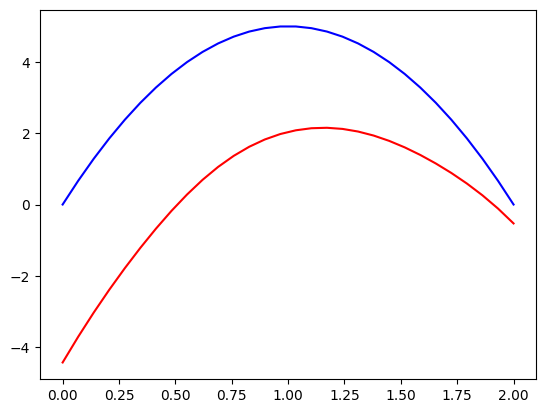

In [610]:
print("ERROR:",np.mean( ((ux2.reshape(t,t).T[1:-1,11] - (-5*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*(y_test**2 - Ly*y_test)   )[1:-1]  )**2 ) *100,'%')
plt.plot(y_test,ux2.reshape(t,t).T[:,0], color = 'red')
plt.plot(y_test,-5*(y_test**2 - Ly*y_test), color = 'blue')

3.8346564068888256


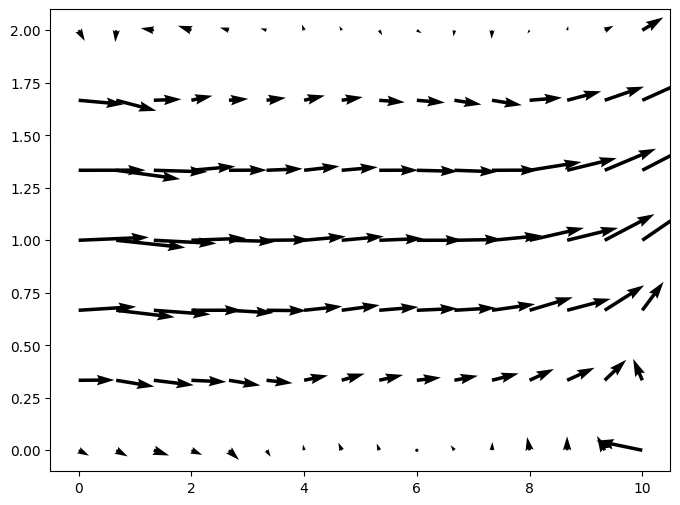

In [607]:
#euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]
ux2 = tps_rbf(euclidian_dist_complete) @ resultado2.x[:N+M]
uy2 = tps_rbf(euclidian_dist_complete) @ resultado2.x[N+M:]
print(uy2.max())
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(X, Y, ux2.reshape(px,py).T, uy2.reshape(px,py).T)

In [82]:
N = (px - 2)*(py - 2)
M_4x = px 
M_4y = py - 2
M = 2* M_4x + 2* M_4y

In [83]:
gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(y_int)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(y_int,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(y_int)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(y_int,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)
gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(y_int),euclidian_dist_border3)
gyy_b3 = tpsdyy(y_int,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(y_int),euclidian_dist_border3)
gy_b3 = tpsdy(y_int,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)
gb4 = tps_rbf(euclidian_dist_border4)

gxx_b2 = tpsdxx(x,euclidian_dist_border2)
gxx_b1 = tpsdxx(x,euclidian_dist_border1)
gyy_b2 = tpsdyy(np.ones_like(x)*Ly,euclidian_dist_border2)
gyy_b1 = tpsdyy(np.zeros_like(x),euclidian_dist_border1)

gy_b2 = tpsdy(np.ones_like(x)*Ly,euclidian_dist_border2)
gy_b1 = tpsdy(np.zeros_like(x),euclidian_dist_border1)

In [84]:
phidphidx = np.array([(g_int[i,:].reshape(-1,1) @ gx_int[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int))])
phidphidy = np.array([(g_int[i,:].reshape(-1,1) @ gy_int[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int))])

phidphidx_b3 = np.array([(gb3[i,:].reshape(-1,1) @ gx_b3[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3))])
phidphidy_b3 = np.array([(gb3[i,:].reshape(-1,1) @ gy_b3[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3))])
phidphidx_b4 = np.array([(gb4[i,:].reshape(-1,1) @ gx_b4[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4))])
phidphidy_b4 = np.array([(gb4[i,:].reshape(-1,1) @ gy_b4[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4))])

#phidphidy_b4.shape


In [103]:
weights3 = np.random.rand(3*px*py,1).reshape(-1,1)/(3*px*py)
#weights3 /= np.sum(weights3)
rho = 1
mu = 1.0
vm = 1.0
Re = 10#Ly*vm*rho/mu
pm = 1
Eu = 1#pm/(rho*vm**2) 
#weights3[:2*(N+M)] = resultado2.x.reshape(-1,1)

In [104]:
Re

10

In [105]:

def NavierStokessUP(weights):
        
    wx = weights[:N+M].reshape(-1,1)
    wy = weights[N+M:2*(N+M)].reshape(-1,1)
    wp = weights[2*(N+M):3*(N+M)].reshape(-1,1)
    wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
    wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
    wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
    wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    #weights = np.concatenate((wx,wxiwxj,wyiwxj,wy,wxiwyj,wyiwyj),axis = 0)
    #print(wp[-1])
    
    F = np.zeros(((3*N+ 6*(M_4x) + 6*(M_4y)),))
    #Ecuaiones diferenciales en puntos internos
        #Ecuacion en x
    F[0:N] +=  ( 1/Re*(-np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) + Eu*np.dot(gx_int,wp) + np.dot(phidphidx,wxiwxj) + np.dot(phidphidy,wyiwxj)).flatten()
        #   Ecuacione en y
    F[N:2*N] += ( 1/Re*(-np.dot(gxx_int,wy) - np.dot(gyy_int,wy)) + Eu*np.dot(gy_int,wp) + np.dot(phidphidx,wxiwyj) + np.dot(phidphidy,wyiwyj)).flatten()
        #Ecuacion de continuidad
    F[2*N:3*N] += 1000*(np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()
    
    #Condiciones de frontera
    
        # Condiciones de ux
    F[3*N  : 3*N +  M_4x] = ( np.dot( gb2 , wx ) ).flatten()
    F[3*N + ( M_4x): 3*N + 2 * ( M_4x)] = (np.dot(gb1,wx)).flatten()
    F[3*N + 2 * ( M_4x ):3*N + 2 * ( M_4x ) + (M_4y)] = 10*(np.dot(gb3,wx) - 1.0/vm).flatten()
    
    
        #Condiciones de uy
    F[3*N + 2 * ( M_4x) + M_4y : 3*N + 3 * ( M_4x ) + M_4y] = (np.dot(gb2,wy)).flatten() 
    F[3*N + 3 * ( M_4x ) + M_4y:3*N + 4 * ( M_4x ) + M_4y] = (np.dot(gb1,wy)).flatten()
    F[3*N + 4 * ( M_4x ) + M_4y:3*N + 4 * ( M_4x ) + 2 * (M_4y)] = (np.dot(gb3,wy)).flatten()
    
        #Condiciones de p
    F[3*N + 4 * ( M_4x ) + 2 * (M_4y):3*N + 4 * ( M_4x ) + 3 * (M_4y)] = (np.dot(gb3,wp)).flatten()
    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida
    F[ 3*N + 4 * ( M_4x ) + 3 * (M_4y) :  3*N + 4 * ( M_4x ) + 4 * (M_4y)] = 1000*(np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N + 4 * ( M_4x ) + 4 * (M_4y):3*N + 4 * ( M_4x ) + 5 * (M_4y)] = 1000*(np.dot(gx_b4,wy)).flatten()
    F[3*N + 4 * ( M_4x ) + 5 * (M_4y):3*N + 4 * ( M_4x ) + 6 * (M_4y)] = ( 1/Re*(-np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) + Eu*np.dot(gx_b4,wp) + np.dot(phidphidx_b4,wxiwxj) + np.dot(phidphidy_b4,wyiwxj)).flatten()
        #Ecuacion en frontera superior
    F[3*N + 4 * ( M_4x ) + 6 * (M_4y):3*N + 5 * ( M_4x ) + 6 * (M_4y) ] = ( 1/Re*(-np.dot(gxx_b2,wy) - np.dot(gyy_b2,wy)) + Eu*np.dot(gy_b2,wp)).flatten()
        #Ecuacion en frontera inferior
    F[3*N + 5 * ( M_4x ) + 6 * (M_4y):3*N + 6 * ( M_4x ) + 6 * (M_4y)] = ( 1/Re*(-np.dot(gxx_b1,wy) - np.dot(gyy_b1,wy)) + Eu*np.dot(gy_b1,wp)).flatten()
    return F#,F.shape
    
    

In [106]:
np.where(NavierStokessUP(weights3) == 0)

(array([], dtype=int64),)

In [107]:
NavierStokessUP(weights3)[-1]

-133.6539650677006

In [108]:
from scipy.optimize import least_squares

# Define el vector inicial
x0 = (weights3.reshape(-1) ) # tamaño_total = tamaño del vector weights
print( NavierStokessUP(weights3).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado3 = least_squares(NavierStokessUP, x0, method='trf', verbose = 2) 

True
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.6582e+14                                    3.71e+16    
       1              2         3.7649e+13      5.28e+14       2.88e-02       4.79e+15    
       2              3         1.5291e+12      3.61e+13       5.77e-02       5.27e+14    
       3              4         1.8914e+09      1.53e+12       1.15e-01       2.04e+12    
       4              5         3.8366e+07      1.85e+09       2.31e-01       4.29e+11    
       5              6         1.7313e+06      3.66e+07       4.61e-01       3.24e+09    
       6              7         2.6610e+04      1.70e+06       9.23e-01       3.61e+08    
       7              8         2.4237e+02      2.64e+04       1.85e+00       3.41e+06    
       8             11         2.3766e+02      4.72e+00       2.31e-01       3.17e+06    
       9             12         7.5445e+01      1.62e+02       5.77e-02       1.65e+0

In [109]:
np.min(NavierStokessUP(resultado3.x))

-0.20898972001305083

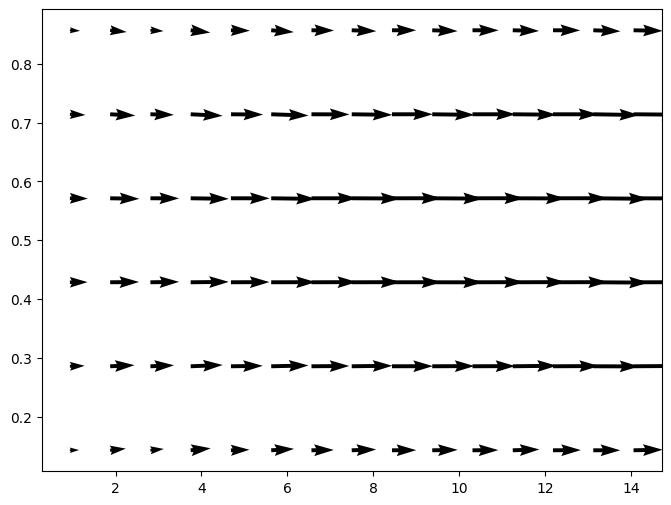

In [110]:
ux3 = tps_rbf(euclidian_dist_int) @ resultado3.x[:N+M]
uy3 = tps_rbf(euclidian_dist_int) @ resultado3.x[N+M:2*(N+M)]
p3 = tps_rbf(euclidian_dist_int) @ resultado3.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xin, Yin, ux3.reshape(px-2,py-2).T, uy3.reshape(px-2,py-2).T)

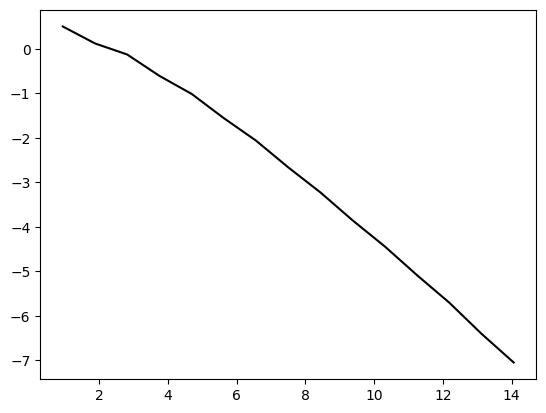

In [111]:
plt.plot(x_int,p3.reshape(px-2,py-2).T[0,:],color = 'black')

ERROR: 14.06337173849543 %


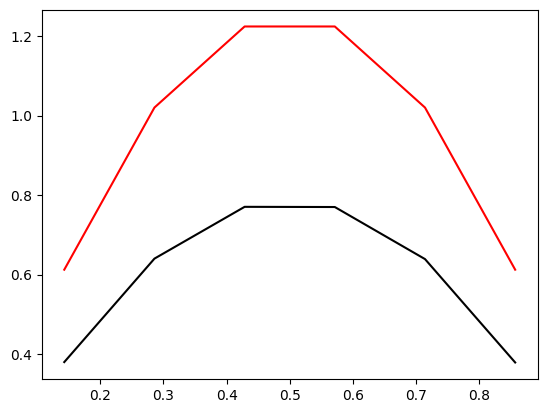

In [112]:
print("ERROR:",np.mean( ((ux3.reshape(px-2,py-2).T[:,8] - (-5*(y_int**2 - Ly*y_int))) /(-5*(y_int**2 - Ly*y_int)   )  )**2 ) *100,'%')
plt.plot(y_int,ux3.reshape(px-2,py-2).T[:,8],color = 'black')
plt.plot(y_int, -5*(y_int**2 - Ly*y_int),color = 'red')

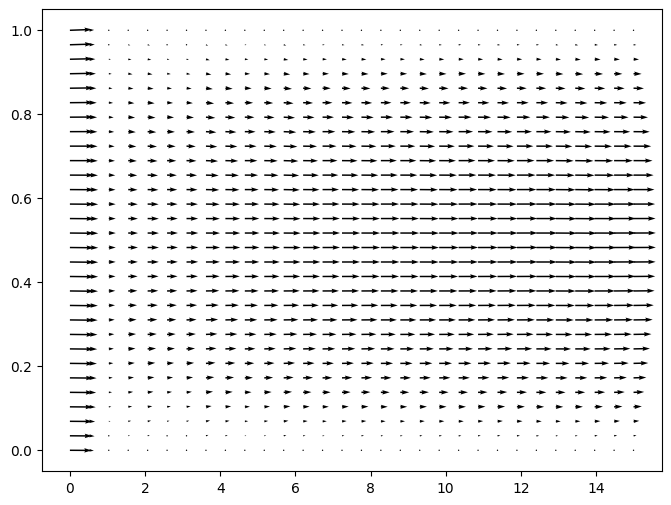

In [113]:
ux3 = tps_rbf(euclidian_dist_test) @ resultado3.x[:N+M]
uy3 = tps_rbf(euclidian_dist_test) @ resultado3.x[N+M:2*(N+M)]
p3 = tps_rbf(euclidian_dist_test) @ resultado3.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xt, Yt, ux3.reshape(t,t).T, uy3.reshape(t,t).T)

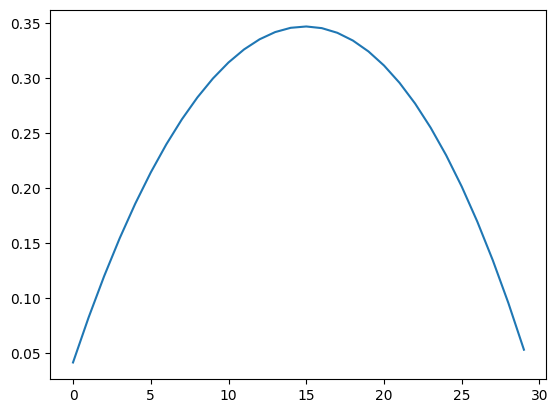

In [59]:
plt.plot(ux3.reshape(t,t).T[:,3])

In [61]:
'''
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# ==== TPS RBF (with safeguards) ====
def tps_rbf(r):
    r = np.maximum(r, 1e-10)
    return r**2 * np.log(r)

def tps_rbf_dx(x, centers):
    diff = x - centers
    r = np.linalg.norm(diff, axis=1)
    r = np.maximum(r, 1e-10)
    dx = diff[:, 0]
    return 2 * dx * np.log(r) + dx

def tps_rbf_dy(x, centers):
    diff = x - centers
    r = np.linalg.norm(diff, axis=1)
    r = np.maximum(r, 1e-10)
    dy = diff[:, 1]
    return 2 * dy * np.log(r) + dy

def tps_rbf_laplace(x, centers):
    r = np.linalg.norm(x - centers, axis=1)
    r = np.maximum(r, 1e-10)
    return 4 * np.log(r) + 6

# ==== Domain and Points ====
p = 15  # collocation grid resolution
x = np.linspace(0, 1, p)
X, Y = np.meshgrid(x, x)
points = np.vstack([X.ravel(), Y.ravel()]).T
N = len(points)

# RBF centers = collocation points
centers = points.copy()

# Boundary and interior masks
def is_boundary(pt):
    return pt[0] == 0 or pt[0] == 1 or pt[1] == 0 or pt[1] == 1

boundary_mask = np.array([is_boundary(pt) for pt in points])
interior_mask = ~boundary_mask
interior_pts = points[interior_mask]
boundary_pts = points[boundary_mask]

# ==== RBF evaluation ====
def build_rbf_matrix(points, centers, rbf_fn):
    return np.array([rbf_fn(pt, centers) for pt in points])

# ==== Parameters ====
Re = 10  # Reynolds number

# ==== Residual Function ====
def residual(w):
    Nu = Nv = Np = N
    wu = w[:Nu]
    wv = w[Nu:Nu+Nv]
    wp = w[Nu+Nv:]

    # Basis function evaluations
    phi = build_rbf_matrix(points, centers, lambda pt, c: tps_rbf(np.linalg.norm(pt - c, axis=1)))
    u = phi @ wu
    v = phi @ wv
    p = phi @ wp

    du_dx = np.array([tps_rbf_dx(pt, centers) @ wu for pt in points])
    du_dy = np.array([tps_rbf_dy(pt, centers) @ wu for pt in points])
    dv_dx = np.array([tps_rbf_dx(pt, centers) @ wv for pt in points])
    dv_dy = np.array([tps_rbf_dy(pt, centers) @ wv for pt in points])
    dp_dx = np.array([tps_rbf_dx(pt, centers) @ wp for pt in points])
    dp_dy = np.array([tps_rbf_dy(pt, centers) @ wp for pt in points])
    lap_u = np.array([tps_rbf_laplace(pt, centers) @ wu for pt in points])
    lap_v = np.array([tps_rbf_laplace(pt, centers) @ wv for pt in points])

    # Interior residuals
    Ru = ((u * du_dx + v * du_dy) + dp_dx - (1/Re) * lap_u)[interior_mask]
    Rv = ((u * dv_dx + v * dv_dy) + dp_dy - (1/Re) * lap_v)[interior_mask]
    Rc = (du_dx + dv_dy)[interior_mask]

    # Boundary conditions (no-slip and pressure fix)
    u_b = u[boundary_mask]
    v_b = v[boundary_mask]
    p0 = tps_rbf(np.linalg.norm(np.array([0, 0]) - centers, axis=1)) @ wp

    # Combine all residuals
    F = np.concatenate([Ru, Rv, Rc, u_b, v_b, [p0]])
    return np.nan_to_num(F, nan=1e6, posinf=1e6, neginf=-1e6)

# ==== Solve ====
w0 = np.random.rand(3 * N)
res = least_squares(residual, w0, method='trf', verbose=2)

# ==== Extract solutions ====
wu = res.x[:N]
wv = res.x[N:2*N]
wp = res.x[2*N:]

phi = build_rbf_matrix(points, centers, lambda pt, c: tps_rbf(np.linalg.norm(pt - c, axis=1)))
u = phi @ wu
v = phi @ wv
p = phi @ wp

# ==== Plot velocity field ====
plt.figure(figsize=(6, 6))
plt.quiver(points[:, 0], points[:, 1], u, v)
plt.title("Velocity field (u, v)")
plt.axis("equal")
plt.grid()
plt.show()

# ==== Plot pressure field ====
plt.figure(figsize=(6, 5))
plt.tricontourf(points[:, 0], points[:, 1], p, levels=20, cmap='coolwarm')
plt.colorbar(label='Pressure')
plt.title("Pressure field p(x,y)")
plt.axis("equal")
plt.grid()
plt.show()

'''

'\nimport numpy as np\nfrom scipy.optimize import least_squares\nimport matplotlib.pyplot as plt\n\n# ==== TPS RBF (with safeguards) ====\ndef tps_rbf(r):\n    r = np.maximum(r, 1e-10)\n    return r**2 * np.log(r)\n\ndef tps_rbf_dx(x, centers):\n    diff = x - centers\n    r = np.linalg.norm(diff, axis=1)\n    r = np.maximum(r, 1e-10)\n    dx = diff[:, 0]\n    return 2 * dx * np.log(r) + dx\n\ndef tps_rbf_dy(x, centers):\n    diff = x - centers\n    r = np.linalg.norm(diff, axis=1)\n    r = np.maximum(r, 1e-10)\n    dy = diff[:, 1]\n    return 2 * dy * np.log(r) + dy\n\ndef tps_rbf_laplace(x, centers):\n    r = np.linalg.norm(x - centers, axis=1)\n    r = np.maximum(r, 1e-10)\n    return 4 * np.log(r) + 6\n\n# ==== Domain and Points ====\np = 15  # collocation grid resolution\nx = np.linspace(0, 1, p)\nX, Y = np.meshgrid(x, x)\npoints = np.vstack([X.ravel(), Y.ravel()]).T\nN = len(points)\n\n# RBF centers = collocation points\ncenters = points.copy()\n\n# Boundary and interior masks\nd